# 탐색적 데이터 분석
# EDA: Exploratory Data Analysis

- 통찰을 얻기 위한 데이터 분석의 가장 기본이 되는 방법
- 탐색적 데이터 분석 과정

    - 1. 데이터 파악
        - 데이터의 외형적인 내용을 파악하는 단계
        - raw data: 분석에 활용된 적이 없는, 또는 정제되지 않은 데이터
        - 1) 데이터의 출처와 주제 파악
            - 데이터가 어디에서 생성된 것인지
            - 데이터가 어떻게 수집된 것인지
            - 예) 데이터의 이름, 구성 요소, 출처, 주제 등 
        - 2) 데이터의 크기 파악
            - 데이터의 크기에 따라서 데이터 처리방식이 달라지기 때문에
            - 예) 샘플링 : 어떤 자료로부터 일부의 값을 추출하는 행위
                - 데이터가 너무 크거나 전체 데이터를 활용할 수 없는 경우에 수행
        - 3) 데이터의 구성 요소(피처) 파악 
            - 데이터가 어떻게 구성되어 있는지, 어떤 정보를 담고있는지를 파악하는 아주 중요한 단계
            - 예) 신체검사 데이터의 키, 몸무게, 시력, 청력 등
            
    - 2. 데이터 속성 탐색
        - 데이터의 실제적인 내용을 파악하는 단계
        - 1) 피처의 속성 탐색 
            - 피처 속성 탐색 단계에서 가장 중요한 것은 **데이터에 질문을 던지는 것**
                - 예) 우리 반의 평균 키는 몇이나 될까?
            - 평균, 표준편차, 중앙값, 사분위 수 등의 통계값을 통해 피처의 정량적 속성 정의
        - 2) 피처 간의 상관관계 탐색
            - 예) 학급이 비만인지 알아보려 했다고 가정하면 몸무게와 관계가 있는 피처 파악(키)
            
    - 3. 탐색한 데이터 시각화
        - 지금까지 파악한 데이터를 효과적으로 시각화
        - 시각화는 수치적 자료만 가지고는 파악하기 힘든 패턴이나 통찰을 발견하는데에 유용
        
    - (+ 4. 근거로 분석결과 뒷받침) 
        - 논문, 인터뷰, 신문기사, 뉴스 등 

# 멕시코풍 프랜차이즈 chipotle 주문 데이터 분석

- 가장 인기있는 메뉴 파악하기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chipo = pd.read_csv("chipotle.tsv", sep='\t')

## 1. 데이터 파악 

In [4]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
chipo.shape

(4622, 5)

In [6]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [9]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [10]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [12]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

- ****피처의 의미****
    - order_id : 주문 번호
    - quantity : 아이템의 주문 수량
    - item_name : 주문한 아이템의 이름
    - choice_description : 주문한 아이템의 상세 선택 옵션
    - item_price : 주문 아이템의 가격 정보 

### 피처 형태의 종류

- 수치형 피처
    - 연속형 피처
        - 어떤 구간 안의 모든 값을 데이터로 가질 수 있음. 
            - 예) 키, 몸무게
    - 비연속형 피처
        - 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 함. 
            - 예) 나이
      
- 범주형 피처 
    - 순서 있는 범주형 피처
        - 순서가 있으나 수치는 아님. 
            - 예) 학점(A+, A0, ...), 학력, 설문 선택지 
    - 순서 없는 범주형 피처 
        - 데이터가 구분되면서도 순서가 없음.
            - 예) 혈액형(A, B, O, AB), 성별, MBTI

In [13]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


- 간이 분석 내용
    - 평균 주문 수량은 약 1.08개
        - 즉 대부분 한 아이템은 하나만 주문 
        - 한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다. 
        
    - order_id 는 숫자의 의미를 갖지 않기 때문에 str로 변환해야할 수 있음.
        - 변환할 경우 데이터 전처리 필요 
        
    - item_price 는 수치적 특징을 파악해야하는데, object 타입이기 때문에 수치형으로 변환해야함. 
        - 데이터 전처리 필요

In [16]:
# 범주형 피처의 데이터 개수 파악하기 
# np.unique(chipo.item_name) 도 가능
print(chipo.item_name.nunique())
print(chipo.order_id.nunique())
# print(len(chipo.item_name.unique()))
# print(len(chipo.order_id.unique()))

50
1834


- 메뉴 종류는 총 50개
- 주문 건수는 총 1834개

## 2. 데이터 속성 탐색

### 2-1. 가장 많이 주문한 아이템 Top 10

In [18]:
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

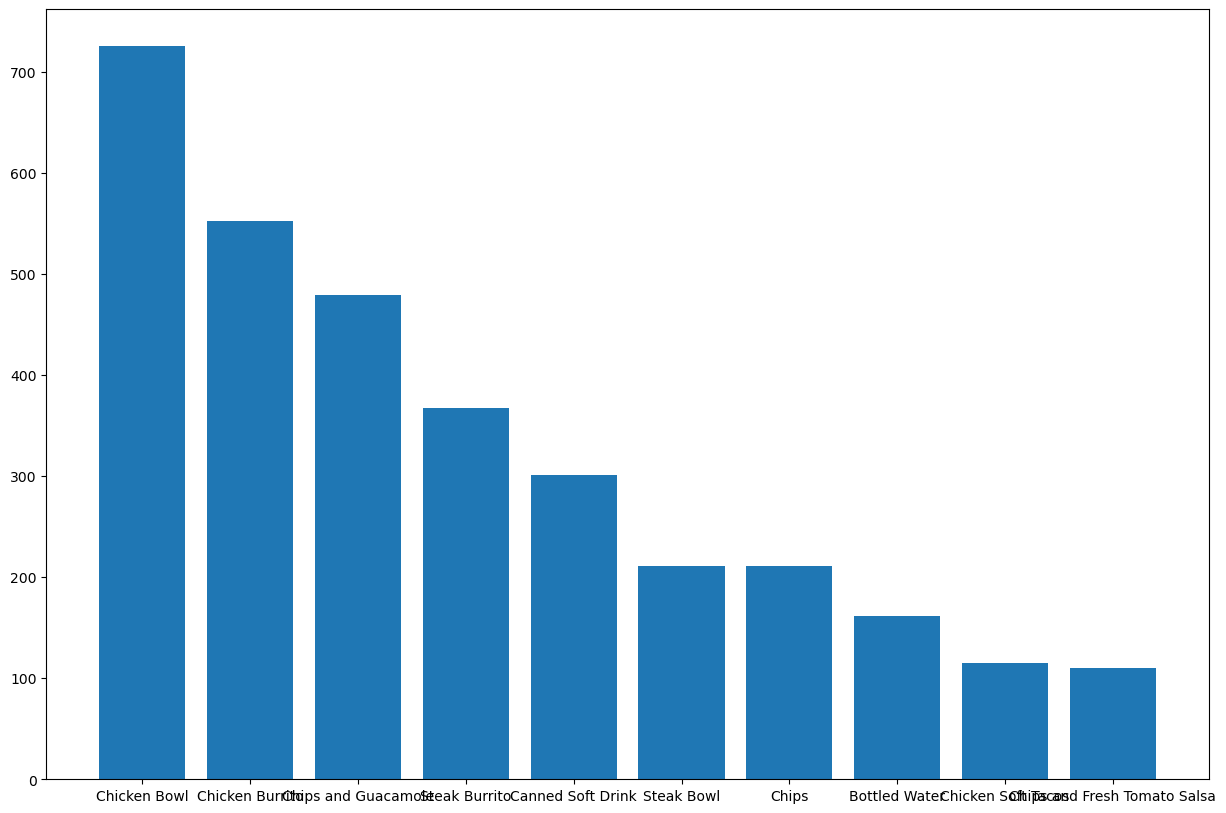

In [22]:
plt.figure(figsize=(15,10))
plt.bar(chipo['item_name'].value_counts()[:10].index,
       chipo['item_name'].value_counts()[:10].values)
plt.show()

### 2-2. 아이템별 주문 횟수와 중량

In [24]:
# 아이템별 주문 건수
order_cnt = chipo.groupby("item_name")['order_id'].count()
print(order_cnt[:10])
print()

# 아이템별 총 주문 수량 
item_qt = chipo.groupby("item_name")['quantity'].sum()
print(item_qt[:10])

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


### 2-3. 간이 시각화

- item 수가 많아서 시각화로 다 나타내기 힘들어서 숫자로 표현

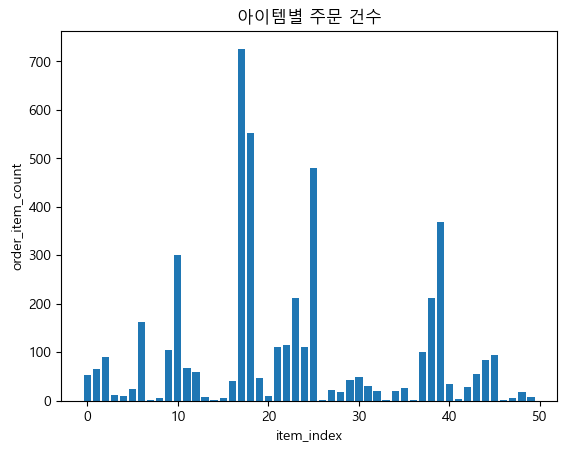

In [29]:
# 한글 폰트 개짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = "C:/Windows/Fonts/malgun.ttf" # 맑은 고딕...
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family=font_name)

x_pos = np.arange(len(item_qt))

plt.bar(x_pos, order_cnt)
plt.ylabel("order_item_count")
plt.xlabel("item_index")
plt.title("아이템별 주문 건수")
plt.show()

In [30]:
# 값 내림차순 정렬: sort_values(ascending=False)
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [32]:
# 인덱스명 알파벳 순 정렬: sort_index()
chipo.groupby('item_name')['quantity'].sum().sort_index()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


## 3. 데이터 전처리

In [3]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

- [원인]
    - 가격을 나타내는 숫자 앞에 $ 기호가 붙어 있음
    
- [해결 방안]
    - map과 lambda를 통해 float형으로 변환
        - map : 시리즈의 각 값에 함수를 적용할 수 있는 기능 
        - lambda : 임시로 사용할 익명 함수(anonymous function)를 간편하게 표현하는 방식 

In [4]:
# chipo['new_item_price'] = chipo['item_price'].map(lambda x: float(x[1:]))과 같음
chipo['new_item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [38]:
# 그냥은 원본이 변경되지 않음 
chipo.drop('item_price', axis=1)

,order_id,quantity,item_name,choice_description,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [5]:
# 원본 변경 
chipo.drop('item_price', axis=1, inplace=True)
chipo.head()

,order_id,quantity,item_name,choice_description,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [6]:
# 열 이름 변경: df.rename({'':''}, inplace=True)
chipo.rename(columns={'new_item_price':'item_price'}, inplace=True)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [43]:
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [7]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


- 한 아이템 당 평균 금액은 7.4 달러 
- 최대 44.25달러, 최소 1.09달러

### 주문당 평균 계산금액

In [8]:
total_price_per_order = chipo.groupby('order_id')['item_price'].sum()
# 주문당 평균 계산금액 
total_price_per_order.values.mean()

18.811428571428568

In [9]:
total_price_per_order

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

- 한 사람이 약 19달러 가량의 주문을 할 것으로 예상

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


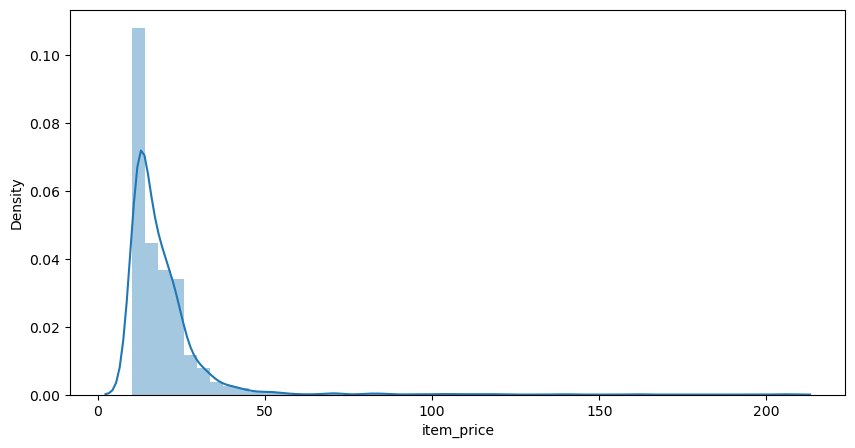

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(total_price_per_order)
plt.show()

In [12]:
order_group = chipo.groupby('order_id').sum()
order_group[order_group['item_price']>=10]
# 모두 10달러 이상은 씀. 

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [13]:
order_group

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


### 각 아이템의 가격 구하기

- 현재 아이템 데이터는 없기 때문에 아이템의 가격을 구하기 위해서는 주문 데이터에서 유추하는 방법밖에 없음.

1) 동일한 아이템을 1개만 구매한 주문을 선별 

2) item_name을 기준으로 그룹화한 뒤 각 그룹별 최저가 계산

In [16]:
one_item = chipo[chipo['quantity']==1]
item_price = one_item.groupby('item_name').min()
item_price

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,129,1,[Coke],6.49
Barbacoa Bowl,19,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,11,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,75,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,17,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [17]:
item_price.sort_values(by='item_price')

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,17,1,NaN,1.09
Canned Soda,14,1,[Coca Cola],1.09
Canned Soft Drink,114,1,[Coke],1.25
Side of Chips,3,1,NaN,1.69
Chips,19,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,130,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,85,1,NaN,2.39


In [18]:
item_price.sort_values(by='item_price',ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


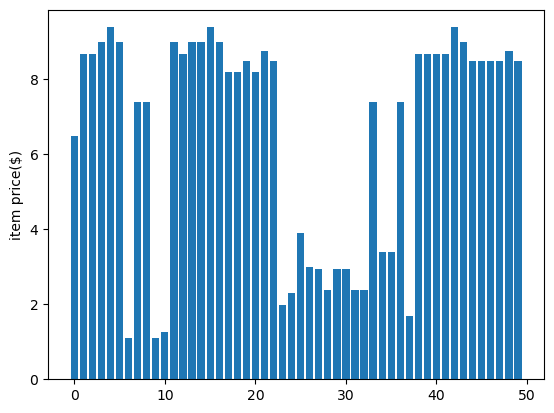

In [19]:
# 아이템 가격 시각화 
x_pos = np.arange(len(item_price))

plt.bar(x_pos, item_price['item_price'])
plt.ylabel("item price($)")
plt.show()

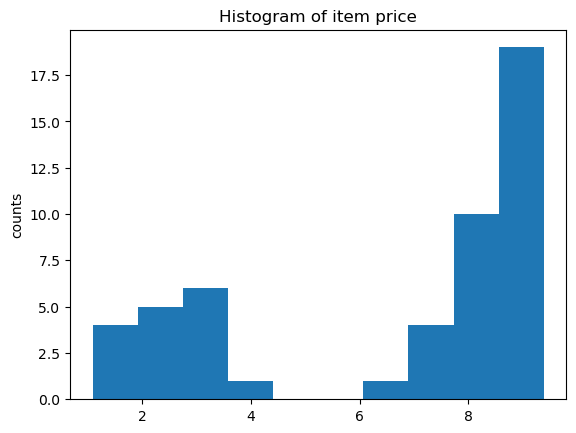

In [20]:
# 아이템 가격 히스토그램
plt.hist(item_price['item_price'])
plt.ylabel("counts")
plt.title("Histogram of item price")
plt.show()

### 가장 비싼 주문은 총 몇개의 아이템을 주문했는지 파악 

In [22]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [27]:
chicken_df = chipo[chipo['item_name']=='Chicken Bowl']
chicken_df.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [29]:
group_chicken = chicken_df.groupby('order_id')['quantity'].sum()
group_chicken.head()

order_id
2     2
3     1
7     1
10    1
13    1
Name: quantity, dtype: int64

In [30]:
result = group_chicken[group_chicken>=2]
result.head()

order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64

In [31]:
result.sum()

260

- chicken bowl 메뉴는 전체 726개 중 260개는 2개 이상 주문되어졌음. 